In [ ]:
import pandas as pd

## Unzip the zip file downloaded


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('orders_data.csv.zip') 
zip_ref.extractall() # extract file to dir

# unzipping the file -> so that the data is extracted then we'll import it 

zip_ref.close() # close file

In [3]:
df=pd.read_csv('orders_data.csv')
df.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [4]:
df.shape

(9994, 16)

## Info of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


## We see that Order Date has object datatype, we need to change it to datetime

## Ship mode column has values like Not Available and unknown -> so while reading data from file, we can handle them as NA values

In [6]:
df['Ship Mode'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [7]:
df1 = pd.read_csv('orders_data.csv' , na_values=['Not Available', 'unknown'])
df1['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

## Derive new columns discount , sale price and profit

In [8]:
df1['Selling_Price'] = df1['List Price'] - df['List Price']*(df['Discount Percent']/100)
df1

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Selling_Price
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,254.8
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,708.1
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,9.5
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,940.8
4,5,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,18-02-2023,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4,28.8
9990,9991,17-03-2023,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4,86.4
9991,9992,07-08-2022,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2,254.8
9992,9993,19-11-2022,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3,29.1


In [9]:
df1['Profit'] = df1['Selling_Price'] - df1['cost price']
df1


,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Selling_Price,Profit
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,254.8,14.8
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,708.1,108.1
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,9.5,-0.5
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,940.8,160.8
4,5,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,18-02-2023,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4,28.8,-1.2
9990,9991,17-03-2023,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4,86.4,16.4
9991,9992,07-08-2022,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2,254.8,34.8
9992,9993,19-11-2022,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3,29.1,-0.9


In [10]:
df1.rename(columns ={'Profit' : 'Unit_Profit', 'Selling_Price' : 'Unit_Selling_Price'}, inplace = True)
df1.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Unit_Selling_Price,Unit_Profit
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,254.8,14.8
1,2,15-08-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,708.1,108.1
2,3,10-01-2023,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,9.5,-0.5
3,4,18-06-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,940.8,160.8
4,5,13-07-2022,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,19.0,-1.0


## changing datatype of Order Date column from object to datetime

In [11]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'], format='%d-%m-%Y')

In [12]:
df1.dtypes

Order Id                       int64
Order Date            datetime64[ns]
Ship Mode                     object
Segment                       object
Country                       object
City                          object
State                         object
Postal Code                    int64
Region                        object
Category                      object
Sub Category                  object
Product Id                    object
cost price                     int64
List Price                     int64
Quantity                       int64
Discount Percent               int64
Unit_Selling_Price           float64
Unit_Profit                  float64
dtype: object

## Dropping Columns

In [14]:
df1.drop(columns = ['cost price','List Price','Discount Percent'],inplace = True)
df1.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,19.0,-1.0


In [15]:
df1['Total_Profit'] = df1['Quantity'] * df1['Unit_Profit'] 

In [30]:
df1.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,254.8,14.8,29.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,708.1,108.1,324.3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,9.5,-0.5,-1.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,940.8,160.8,804.0
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,19.0,-1.0,-2.0


## Exporting dataframe to SQL - using SQLALCHEMY library

In [32]:
pip install sqlalchemy pyodbc

Note: you may need to restart the kernel to use updated packages.


In [34]:
import sqlalchemy as sal

In [ ]:

#engine = sal.create_engine('mssql://DESKTOP-EK9BKSJ/project?driver=ODBC+DRIVER+18+FOR+SQLSERVER?trusted_connection=yes&Encrypt=no')
from sqlalchemy import create_engine

server = "DESKTOP-EK9BKSJ"
database = "project"
driver = "ODBC Driver 18 for SQL Server"

# Bağlantı dizesi
engine = create_engine(f"mssql+pyodbc://@{server}/{database}?driver=SQL+Server&trusted_connection=yes")

# Engine oluştur
#engine = create_engine(conn_str)





In [36]:
import pyodbc

# Bilgilerini buraya yaz
server = "DESKTOP-EK9BKSJ"  # Veya kendi sunucu adın
database = "project"       # Örn: "MyDatabase"
driver = "ODBC Driver 18 for SQL Server"

try:
    # Bağlantı
    conn = pyodbc.connect(
        f"DRIVER={driver};"
        f"SERVER={server};"
        f"DATABASE={database};"
        f"Trusted_Connection=yes;"
        f"Encrypt=no;"
    )

    cursor = conn.cursor()

    # Test sorgusu: Tabloları listele
    cursor.execute("SELECT name FROM sys.tables")

    print("✅ Bağlantı başarılı! Tablolar:")
    for row in cursor.fetchall():
        print("-", row[0])

    conn.close()

except Exception as e:
    print("❌ Bağlantı hatası:", e)



✅ Bağlantı başarılı! Tablolar:
- order_data
- neworderr_data
- orders_data


In [38]:
conn = engine.connect()
conn

NameError: name 'engine' is not defined

In [40]:
df1.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,254.8,14.8,29.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,708.1,108.1,324.3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,9.5,-0.5,-1.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,940.8,160.8,804.0
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,19.0,-1.0,-2.0


In [42]:
df1

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,254.8,14.8,29.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,708.1,108.1,324.3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,9.5,-0.5,-1.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,940.8,160.8,804.0
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,19.0,-1.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,28.8,-1.2,-3.6
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,2,86.4,16.4,32.8
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,2,254.8,34.8,69.6
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,4,29.1,-0.9,-3.6


## Q1. Find top 10 highest profit generating products

In [44]:
df1.groupby('Product Id').sum(['Total_Profit'])

,Order Id,Postal Code,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit
Product Id,,,,,,
FUR-BO-10000112,3513,60653,9,805.1,45.1,405.9
FUR-BO-10000330,13658,256733,10,1036.4,146.4,560.0
FUR-BO-10000362,18886,184360,14,2089.4,189.4,638.6
FUR-BO-10000468,35749,357215,21,706.1,86.1,380.6
FUR-BO-10000711,9310,120635,12,830.9,40.9,345.9
...,...,...,...,...,...,...
TEC-PH-10004912,21739,166396,11,493.8,53.8,203.8
TEC-PH-10004922,31470,296048,19,1037.3,57.3,259.2
TEC-PH-10004924,13937,105326,8,48.2,-1.8,-6.0


In [46]:
df1.groupby('Product Id').sum(['Total_Profit']).sort_values(by =  ['Total_Profit'], ascending = False)

,Order Id,Postal Code,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit
Product Id,,,,,,
TEC-CO-10004722,28222,194875,20,59514.0,5644.0,24816.0
TEC-MA-10002412,2698,32216,6,21734.4,3624.4,21746.4
OFF-BI-10000545,57937,302599,48,18249.0,1959.0,17867.7
TEC-CO-10001449,41444,428939,38,18151.2,2631.2,15948.0
FUR-CH-10002024,44560,448062,39,21096.2,2246.2,13930.7
...,...,...,...,...,...,...
OFF-BI-10003712,46354,562879,45,124.7,-5.3,-35.7
OFF-AR-10003631,20973,277819,30,106.4,-3.6,-37.0
OFF-PA-10000143,38761,389204,29,153.8,-6.2,-39.5


In [48]:
df1.groupby('Product Id').sum(['Total_Profit']).sort_values(by =  ['Total_Profit'], ascending = False).reset_index()[['Product Id','Total_Profit']].head(10)

,Product Id,Total_Profit
0,TEC-CO-10004722,24816.0
1,TEC-MA-10002412,21746.4
2,OFF-BI-10000545,17867.7
3,TEC-CO-10001449,15948.0
4,FUR-CH-10002024,13930.7
5,OFF-BI-10003527,12792.9
6,TEC-PH-10001459,11481.9
7,TEC-MA-10000822,10102.3
8,FUR-TA-10000198,10015.1
9,TEC-MA-10001047,9989.0


In [50]:
df1[df1['Category'].isin(['Technology', 'Furniture'])] \
   .groupby('Category')['Total_Profit'] \
   .sum() \
   .sort_values(ascending=False) \
   .reset_index()

,Category,Total_Profit
0,Technology,379720.7
1,Furniture,342782.4


## Calculate the Total unit profit only for the 'Consumer' segment.

## Calculate the Total unit profit only for the 'Consumer' segment.

In [52]:
df1[df1['Segment'] == 'Consumer'] \
   .groupby('Segment')['Total_Profit'] \
   .sum() \
   .reset_index()


,Segment,Total_Profit
0,Consumer,514980.1


In [54]:
df1.head()


,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,254.8,14.8,29.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,708.1,108.1,324.3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,9.5,-0.5,-1.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,940.8,160.8,804.0
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,19.0,-1.0,-2.0


In [56]:
df1['Quantity']

0       2
1       3
2       2
3       5
4       2
       ..
9989    3
9990    2
9991    2
9992    4
9993    2
Name: Quantity, Length: 9994, dtype: int64

In [58]:
df1['Unit_Selling_Price']

0       254.8
1       708.1
2         9.5
3       940.8
4        19.0
        ...  
9989     28.8
9990     86.4
9991    254.8
9992     29.1
9993    232.8
Name: Unit_Selling_Price, Length: 9994, dtype: float64

In [60]:
df1['Total_Sale'] = df1['Unit_Selling_Price'] *df1['Quantity']

In [62]:
df1['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

##   Data Slicing: Extract data for the year 2023.

In [64]:
df1.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,254.8,14.8,29.6,509.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,708.1,108.1,324.3,2124.3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,9.5,-0.5,-1.0,19.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,940.8,160.8,804.0,4704.0
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,19.0,-1.0,-2.0,38.0


In [66]:
df1[df1['Order Date'].dt.year == 2023].sort_values(by='Order Date', ascending = True)


,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale
4285,4286,2023-01-01,Second Class,Corporate,United States,Port Arthur,Texas,77642,Central,Office Supplies,Labels,OFF-LA-10000240,2,9.6,-0.4,-0.8,19.2
7045,7046,2023-01-01,Standard Class,Corporate,United States,Dallas,Texas,75217,Central,Office Supplies,Paper,OFF-PA-10002160,2,9.6,-0.4,-0.8,19.2
4965,4966,2023-01-01,Second Class,Corporate,United States,Columbia,Tennessee,38401,South,Technology,Phones,TEC-PH-10001944,4,460.6,30.6,122.4,1842.4
7120,7121,2023-01-01,Standard Class,Corporate,United States,Smyrna,Tennessee,37167,South,Office Supplies,Binders,OFF-BI-10003091,1,67.2,7.2,7.2,67.2
6500,6501,2023-01-01,Standard Class,Home Office,United States,Louisville,Kentucky,40214,South,Office Supplies,Binders,OFF-BI-10000069,6,85.5,5.5,33.0,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,911,2023-12-31,Standard Class,Home Office,United States,Jackson,Michigan,49201,Central,Technology,Accessories,TEC-AC-10004666,7,1852.8,22.8,159.6,12969.6
7683,7684,2023-12-31,First Class,Home Office,United States,Midland,Michigan,48640,Central,Office Supplies,Binders,OFF-BI-10003527,3,3695.7,535.7,1607.1,11087.1
413,414,2023-12-31,Standard Class,Consumer,United States,San Francisco,California,94110,West,Furniture,Chairs,FUR-CH-10003956,2,104.5,4.5,9.0,209.0
5471,5472,2023-12-31,Standard Class,Consumer,United States,Parker,Colorado,80134,West,Furniture,Furnishings,FUR-FU-10000320,5,9.5,-0.5,-2.5,47.5


## Cities have been shipped

In [68]:
df1['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

## Calculate the total selling price and profits for all orders

In [70]:
df1['Order_Value'] = df1['Unit_Selling_Price']* df1['Quantity']
df1.head(1)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,254.8,14.8,29.6,509.6,509.6


In [72]:
df1.groupby('Order Id')

In [74]:
df1.groupby('Order Id').sum(['Quantity'])

,Postal Code,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value
Order Id,,,,,,,
1,42420,2,254.8,14.8,29.6,509.6,509.6
2,42420,3,708.1,108.1,324.3,2124.3,2124.3
3,90036,2,9.5,-0.5,-1.0,19.0,19.0
4,33311,5,940.8,160.8,804.0,4704.0,4704.0
5,33311,2,19.0,-1.0,-2.0,38.0,38.0
...,...,...,...,...,...,...,...
9990,33180,3,28.8,-1.2,-3.6,86.4,86.4
9991,92627,2,86.4,16.4,32.8,172.8,172.8
9992,92627,2,254.8,34.8,69.6,509.6,509.6


In [76]:
df1.groupby('Order Id').sum(['Quantity'])[['Order_Value', 'Total_Profit']]

,Order_Value,Total_Profit
Order Id,,
1,509.6,29.6
2,2124.3,324.3
3,19.0,-1.0
4,4704.0,804.0
5,38.0,-2.0
...,...,...
9990,86.4,-3.6
9991,172.8,32.8
9992,509.6,69.6


In [78]:
df1.groupby('Order Id').sum(['Quantity'])[['Order_Value', 'Total_Profit']].reset_index()

,Order Id,Order_Value,Total_Profit
0,1,509.6,29.6
1,2,2124.3,324.3
2,3,19.0,-1.0
3,4,4704.0,804.0
4,5,38.0,-2.0
...,...,...,...
9989,9990,86.4,-3.6
9990,9991,172.8,32.8
9991,9992,509.6,69.6
9992,9993,116.4,-3.6


In [80]:
df1.groupby('Order Id').sum(['Quantity'])[['Order_Value', 'Total_Profit']].reset_index().sort_values(by = ['Total_Profit'],ascending = False)

,Order Id,Order_Value,Total_Profit
2697,2698,130406.4,21746.4
6826,6827,84875.0,14875.0
9039,9040,122141.5,12811.5
4277,4278,61789.0,8309.0
165,166,62668.8,7868.8
...,...,...,...
7929,7930,1710.0,-30.0
4579,4580,739.2,-30.8
2567,2568,22828.5,-31.5
9121,9122,598.5,-31.5


## Find all orders from the 'Technology' category that were shipped using 'Second Class' ship mode, ordered by order date

In [82]:
df1[(df1['Category'] == 'Furniture') & (df1['Ship Mode'] == 'Second Class')].sort_values(by = ['Order Date'],ascending = False)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value
4675,4676,2023-12-30,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19120,East,Furniture,Furnishings,FUR-FU-10003832,2,19.0,-1.0,-2.0,38.0,38.0
425,426,2023-12-26,Second Class,Corporate,United States,Canton,Michigan,48187,Central,Furniture,Furnishings,FUR-FU-10003347,2,28.8,-1.2,-2.4,57.6,57.6
2275,2276,2023-12-22,Second Class,Corporate,United States,Los Angeles,California,90036,West,Furniture,Chairs,FUR-CH-10002774,3,117.6,7.6,22.8,352.8,352.8
4804,4805,2023-12-21,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Furnishings,FUR-FU-10002501,9,87.3,17.3,155.7,785.7,785.7
1011,1012,2023-12-21,Second Class,Consumer,United States,Olympia,Washington,98502,West,Furniture,Furnishings,FUR-FU-10004848,3,155.2,15.2,45.6,465.6,465.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,1434,2022-01-15,Second Class,Consumer,United States,Florence,Alabama,35630,South,Furniture,Chairs,FUR-CH-10000513,14,1765.4,215.4,3015.6,24715.6,24715.6
440,441,2022-01-09,Second Class,Consumer,United States,Detroit,Michigan,48227,Central,Furniture,Furnishings,FUR-FU-10000246,1,9.7,-0.3,-0.3,9.7,9.7
3999,4000,2022-01-09,Second Class,Corporate,United States,Port Saint Lucie,Florida,34952,South,Furniture,Bookcases,FUR-BO-10004709,5,218.5,18.5,92.5,1092.5,1092.5
304,305,2022-01-08,Second Class,Corporate,United States,New York City,New York,10024,East,Furniture,Furnishings,FUR-FU-10002671,2,29.4,9.4,18.8,58.8,58.8


In [84]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [86]:
df[(df['Category'] == 'Furniture')].sort_values(by = ['Order Date'],ascending = False)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
413,414,31-12-2023,Standard Class,Consumer,United States,San Francisco,California,94110,West,Furniture,Chairs,FUR-CH-10003956,100,110,2,5
5471,5472,31-12-2023,Standard Class,Consumer,United States,Parker,Colorado,80134,West,Furniture,Furnishings,FUR-FU-10000320,10,10,5,5
8345,8346,31-12-2023,Standard Class,Consumer,United States,Knoxville,Tennessee,37918,South,Furniture,Chairs,FUR-CH-10000422,190,220,3,4
6030,6031,31-12-2022,Same Day,Consumer,United States,Miami,Florida,33142,South,Furniture,Chairs,FUR-CH-10000155,200,240,1,2
2051,2052,31-12-2022,First Class,Consumer,United States,Philadelphia,Pennsylvania,19134,East,Furniture,Chairs,FUR-CH-10003833,280,340,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,4851,01-01-2023,Standard Class,Consumer,United States,Pasco,Washington,99301,West,Furniture,Chairs,FUR-CH-10000454,860,980,5,2
3777,3778,01-01-2022,Standard Class,Home Office,United States,Chula Vista,California,91911,West,Furniture,Furnishings,FUR-FU-10002298,620,670,6,2
4278,4279,01-01-2022,Standard Class,Corporate,United States,Lakewood,New Jersey,8701,East,Furniture,Furnishings,FUR-FU-10000550,10,10,2,3
2471,2472,01-01-2022,Standard Class,Consumer,United States,Fayetteville,North Carolina,28314,South,Furniture,Bookcases,FUR-BO-10002213,410,450,4,3


## Find Average  order value

In [88]:
import numpy as np
np.mean(df1['Unit_Selling_Price'])

221.7189013408045

## Find the city with the highest total quantity of products ordered.

In [90]:
df1.groupby('City').sum('Unit_Selling_Price')['Quantity'].reset_index().sort_values(by = ['Quantity'], ascending = False)

,City,Quantity
329,New York City,3417
266,Los Angeles,2879
374,Philadelphia,1981
438,San Francisco,1935
452,Seattle,1590
...,...,...
213,Iowa City,1
386,Port Orange,1
257,Lindenhurst,1
259,Littleton,1


## rank orders in each region by quantity in descending order

In [92]:
df1[['Order Id', 'Region', 'Quantity']].sort_values(by = ['Region', 'Quantity'], ascending = [True, False])

,Order Id,Region,Quantity
660,661,Central,14
1045,1046,Central,14
7387,7388,Central,14
8074,8075,Central,14
9515,9516,Central,14
...,...,...,...
9752,9753,West,1
9838,9839,West,1
9902,9903,West,1
9953,9954,West,1


## list all orders placed in the first quarter of any year (January to March), including the total cost for these orders

In [94]:
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,254.8,14.8,29.6,509.6,509.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,708.1,108.1,324.3,2124.3,2124.3


In [96]:
df1['Month'] = df1['Order Date'].dt.month

In [98]:
df1[df1['Month'].isin([1,2,3])]

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value,Month
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,254.8,14.8,29.6,509.6,509.6,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,9.5,-0.5,-1.0,19.0,19.0,1
5,6,2022-03-13,NaN,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,7,48.5,-1.5,-10.5,339.5,339.5,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,6,864.5,4.5,27.0,5187.0,5187.0,1
8,9,2023-03-23,NaN,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,3,19.6,-0.4,-1.2,58.8,58.8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,9964,2022-01-17,Same Day,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Paper,OFF-PA-10003072,2,9.7,-0.3,-0.6,19.4,19.4,1
9966,9967,2022-02-21,Second Class,Corporate,United States,Newark,Delaware,19711,East,Office Supplies,Envelopes,OFF-EN-10004483,7,105.6,5.6,39.2,739.2,739.2,2
9973,9974,2023-03-07,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10004080,5,259.2,29.2,146.0,1296.0,1296.0,3
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,28.8,-1.2,-3.6,86.4,86.4,2


In [102]:
df1['Quarter'] = df1['Order Date'].dt.quarter
df1.head(2)
df1[df1['Quarter'] == 1]

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value,Month,Quarter
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,254.8,14.8,29.6,509.6,509.6,3,1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,9.5,-0.5,-1.0,19.0,19.0,1,1
5,6,2022-03-13,NaN,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,7,48.5,-1.5,-10.5,339.5,339.5,3,1
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,6,864.5,4.5,27.0,5187.0,5187.0,1,1
8,9,2023-03-23,NaN,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,3,19.6,-0.4,-1.2,58.8,58.8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,9964,2022-01-17,Same Day,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Paper,OFF-PA-10003072,2,9.7,-0.3,-0.6,19.4,19.4,1,1
9966,9967,2022-02-21,Second Class,Corporate,United States,Newark,Delaware,19711,East,Office Supplies,Envelopes,OFF-EN-10004483,7,105.6,5.6,39.2,739.2,739.2,2,1
9973,9974,2023-03-07,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10004080,5,259.2,29.2,146.0,1296.0,1296.0,3,1
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,28.8,-1.2,-3.6,86.4,86.4,2,1


In [104]:
df1[df1['Order Date'].dt.month.isin([1,2,3])]  #['Order Id']

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value,Month,Quarter
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,254.8,14.8,29.6,509.6,509.6,3,1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,9.5,-0.5,-1.0,19.0,19.0,1,1
5,6,2022-03-13,NaN,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,7,48.5,-1.5,-10.5,339.5,339.5,3,1
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,6,864.5,4.5,27.0,5187.0,5187.0,1,1
8,9,2023-03-23,NaN,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,3,19.6,-0.4,-1.2,58.8,58.8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,9964,2022-01-17,Same Day,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Paper,OFF-PA-10003072,2,9.7,-0.3,-0.6,19.4,19.4,1,1
9966,9967,2022-02-21,Second Class,Corporate,United States,Newark,Delaware,19711,East,Office Supplies,Envelopes,OFF-EN-10004483,7,105.6,5.6,39.2,739.2,739.2,2,1
9973,9974,2023-03-07,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10004080,5,259.2,29.2,146.0,1296.0,1296.0,3,1
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,28.8,-1.2,-3.6,86.4,86.4,2,1


In [106]:
df1['year'] = df1['Order Date'].dt.year
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value,Month,Quarter,year
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-BO-10001798,2,254.8,14.8,29.6,509.6,509.6,3,1,2023
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-CH-10000454,3,708.1,108.1,324.3,2124.3,2124.3,8,3,2023


In [108]:
temp_df = df1.groupby(['year','Quarter']).sum('Total_Sale')['Total_Sale'].reset_index()
temp_df

,year,Quarter,Total_Sale
0,2022,1,1275547.6
1,2022,2,1355326.7
2,2022,3,1343727.8
3,2022,4,1500939.2
4,2023,1,1559456.2
5,2023,2,1282878.4
6,2023,3,1308164.5
7,2023,4,1453287.8


In [110]:
temp_df[temp_df['Quarter'] == 1]

,year,Quarter,Total_Sale
0,2022,1,1275547.6
4,2023,1,1559456.2


## Find top 10 highest profit generating products

In [112]:
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value,Month,Quarter,year
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-BO-10001798,2,254.8,14.8,29.6,509.6,509.6,3,1,2023
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-CH-10000454,3,708.1,108.1,324.3,2124.3,2124.3,8,3,2023


In [114]:
df1.groupby('Product Id').sum(['Total_Profit'])['Total_Profit'].reset_index().sort_values(by = ['Total_Profit'], ascending = False)

,Product Id,Total_Profit
1614,TEC-CO-10004722,24816.0
1642,TEC-MA-10002412,21746.4
657,OFF-BI-10000545,17867.7
1604,TEC-CO-10001449,15948.0
80,FUR-CH-10002024,13930.7
...,...,...
788,OFF-BI-10003712,-35.7
589,OFF-AR-10003631,-37.0
1023,OFF-PA-10000143,-39.5
748,OFF-BI-10002799,-44.5


## Find top 3 highest selling products in each region acc to quantity

In [116]:
x = df1.groupby(['Region', 'Product Id']).sum('Quantity')['Quantity'].reset_index().sort_values(by = ['Region', 'Quantity'], ascending = [True,False])
x

,Region,Product Id,Quantity
461,Central,OFF-BI-10000301,34
474,Central,OFF-BI-10000756,33
470,Central,OFF-BI-10000546,29
491,Central,OFF-BI-10001249,29
61,Central,FUR-CH-10002304,27
...,...,...,...
5219,West,TEC-PH-10002185,1
5227,West,TEC-PH-10002447,1
5229,West,TEC-PH-10002483,1
5256,West,TEC-PH-10003357,1


In [118]:
x.groupby('Region').head(3).reset_index()

,index,Region,Product Id,Quantity
0,461,Central,OFF-BI-10000301,34
1,474,Central,OFF-BI-10000756,33
2,470,Central,OFF-BI-10000546,29
3,2190,East,OFF-PA-10001970,33
4,1914,East,OFF-BI-10003656,32
5,1549,East,FUR-FU-10004848,31
6,3560,South,OFF-ST-10003716,26
7,2757,South,FUR-CH-10000513,24
8,3231,South,OFF-BI-10004728,24
9,5088,West,TEC-AC-10003832,45


In [120]:
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value,Month,Quarter,year
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-BO-10001798,2,254.8,14.8,29.6,509.6,509.6,3,1,2023
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-CH-10000454,3,708.1,108.1,324.3,2124.3,2124.3,8,3,2023


## total sale in each region

In [122]:
df1.groupby('Region').sum(['Sale'])['Total_Sale'].reset_index()


,Region,Total_Sale
0,Central,2387881.2
1,East,3257983.8
2,South,1966053.6
3,West,3467409.6


## Find top 5 highest selling products in each region according to sales

In [124]:
df1.groupby(['Region', 'Product Id']).sum(['Total_Sale']).sort_values(by = ['Total_Sale'],ascending=False)

Order Id  Postal Code  Quantity  Unit_Selling_Price  \
Region  Product Id                                                             
South   TEC-MA-10002412      2698        32216         6             21734.4   
Central OFF-BI-10000545     17681       123422        18             10132.7   
East    TEC-CO-10004722     13241        48855        11             29099.0   
Central TEC-CO-10004722      6827        47905         5             16975.0   
East    TEC-MA-10001047     10619        18736        11             13767.0   
...                           ...          ...       ...                 ...   
        OFF-AR-10000369      1232        14215         2                 0.0   
Central OFF-FA-10003059      4201       139355         4                 0.0   
        FUR-FU-10001918      8184        60653         1                 0.0   
        OFF-BI-10004141      8457       138860         5                 0.0   
East    OFF-BI-10004967      5178        10024         3                 0.0   

                         Unit_Profit  Total_Profit  Total_Sale  Order_Value  \
Region  Product Id                                                            
South   TEC-MA-10002412       3624.4       21746.4    130406.4     130406.4   
Central OFF-BI-10000545       1072.7       13247.5    125827.5     125827.5   
East    TEC-CO-10004722       2249.0        8261.0    106421.0     106421.0   
Central TEC-CO-10004722       2975.0       14875.0     84875.0      84875.0   
East    TEC-MA-10001047       1607.0        9989.0     81549.0      81549.0   
...                              ...           ...         ...          ...   
        OFF-AR-10000369          0.0           0.0         0.0          0.0   
Central OFF-FA-10003059          0.0           0.0         0.0          0.0   
        FUR-FU-10001918          0.0           0.0         0.0          0.0   
        OFF-BI-10004141          0.0           0.0         0.0          0.0   
East    OFF-BI-10004967          0.0           0.0         0.0          0.0   

                         Month  Quarter  year  
Region  Product Id                             
South   TEC-MA-10002412     10        4  2023  
Central OFF-BI-10000545      5        2  4046  
East    TEC-CO-10004722     21        8  6068  
Central TEC-CO-10004722      8        3  2022  
East    TEC-MA-10001047      3        2  4045  
...                        ...      ...   ...  
        OFF-AR-10000369      3        1  2022  
Central OFF-FA-10003059     10        4  4044  
        FUR-FU-10001918      6        2  2022  
        OFF-BI-10004141     13        5  4045  
East    OFF-BI-10004967      3        1  2022  

[5298 rows x 11 columns]

In [126]:
df1.groupby(['Region', 'Product Id']).sum(['Total_Sale']).reset_index()

,Region,Product Id,Order Id,Postal Code,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value,Month,Quarter,year
0,Central,FUR-BO-10000112,3513,60653,9,805.1,45.1,405.9,7245.9,7245.9,4,2,2023
1,Central,FUR-BO-10000362,1595,61604,3,349.2,49.2,147.6,1047.6,1047.6,1,1,2022
2,Central,FUR-BO-10000468,3031,48146,4,180.5,30.5,122.0,722.0,722.0,9,3,2022
3,Central,FUR-BO-10000711,5221,48234,3,203.7,3.7,11.1,611.1,611.1,7,3,2023
4,Central,FUR-BO-10000780,16297,229596,17,2223.1,243.1,1503.7,14003.7,14003.7,16,6,6068
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5293,West,TEC-PH-10004896,1088,94601,3,68.6,8.6,25.8,205.8,205.8,1,1,2022
5294,West,TEC-PH-10004897,4320,87105,3,19.2,-0.8,-2.4,57.6,57.6,12,4,2023
5295,West,TEC-PH-10004908,38344,421143,22,1433.2,123.2,680.4,7300.4,7300.4,25,10,10114
5296,West,TEC-PH-10004922,11121,180757,9,459.2,39.2,199.2,2299.2,2299.2,17,6,4044


In [128]:
x = df1.groupby(['Region', 'Product Id']).sum(['Total_Sale'])['Total_Sale'].reset_index()
y = x.sort_values(by = ['Region', 'Total_Sale'], ascending=[True, False])
y.groupby('Region').head(5).reset_index()

,index,Region,Product Id,Total_Sale
0,469,Central,OFF-BI-10000545,125827.5
1,1166,Central,TEC-CO-10004722,84875.0
2,1168,Central,TEC-MA-10000822,77509.8
3,488,Central,OFF-BI-10001120,55282.5
4,617,Central,OFF-BI-10004995,42210.0
5,2556,East,TEC-CO-10004722,106421.0
6,2565,East,TEC-MA-10001047,81549.0
7,1342,East,FUR-BO-10004834,66364.2
8,2548,East,TEC-CO-10001449,60948.0
9,1369,East,FUR-CH-10002024,60189.6


In [130]:
x.sort_values(by = ['Region', 'Total_Sale'], ascending=[True, False])

,Region,Product Id,Total_Sale
469,Central,OFF-BI-10000545,125827.5
1166,Central,TEC-CO-10004722,84875.0
1168,Central,TEC-MA-10000822,77509.8
488,Central,OFF-BI-10001120,55282.5
617,Central,OFF-BI-10004995,42210.0
...,...,...,...
4571,West,OFF-FA-10003472,0.0
4581,West,OFF-LA-10000134,0.0
4622,West,OFF-LA-10003714,0.0
4817,West,OFF-PA-10004000,0.0


In [132]:
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value,Month,Quarter,year
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-BO-10001798,2,254.8,14.8,29.6,509.6,509.6,3,1,2023
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-CH-10000454,3,708.1,108.1,324.3,2124.3,2124.3,8,3,2023


## Find month over month growth comparison for 2022 and 2023 sales eg : jan 2022 vs jan 2023


In [134]:
df.head(1)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,01-03-2023,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2


In [136]:
df1.groupby(['Month', 'year'])

In [138]:
df1.groupby(['Month', 'year']).sum('Total_Sale')

Order Id  Postal Code  Quantity  Unit_Selling_Price  Unit_Profit  \
Month year                                                                     
1     2022   2203269     25254924      1650             94712.5       9092.5   
      2023   2159265     22745269      1543             88632.6       8272.6   
2     2022   1942952     21548462      1511             90091.0       9101.0   
      2023   1963083     21939004      1574            128124.2      11554.2   
3     2022   2001085     20660876      1447             80106.0       7076.0   
      2023   2204143     23815029      1651             82512.3       7642.3   
4     2022   2214787     25361800      1648             95451.6       8801.6   
      2023   1941539     22098149      1501            111568.6      10028.6   
5     2022   2076080     23908332      1639             79448.3       7088.3   
      2023   2038723     23553002      1561             86447.9       8187.9   
6     2022   1967618     21814012      1528             94170.5       8300.5   
      2023   1864583     20450282      1422             68976.5       6186.5   
7     2022   2157975     23743535      1579             78652.2       7422.2   
      2023   2418956     26432714      1844             90563.8       8163.8   
8     2022   2237092     24724255      1706            104808.0      11768.0   
      2023   2155249     23170424      1642             87733.6       8353.6   
9     2022   2091402     21205155      1471             79142.2       6892.2   
      2023   1767956     18928012      1281             76658.6       6678.6   
10    2022   2153052     24592596      1744            118912.7       9632.7   
      2023   2027157     23090094      1627            121061.5      12621.5   
11    2022   2126015     23371960      1568             84225.3       7765.3   
      2023   1989561     21892615      1487             75432.8       6522.8   
12    2022   1990905     22506776      1585             95869.9       8679.9   
      2023   2252568     24765375      1664            102556.1       9336.1   

            Total_Profit  Total_Sale  Order_Value  Quarter  
Month year                                                  
1     2022       43521.3    437431.3     437431.3      439  
      2023       42525.5    434765.5     434765.5      419  
2     2022       47461.1    444011.1     444011.1      399  
      2023       67118.8    731638.8     731638.8      401  
3     2022       33915.2    394105.2     394105.2      401  
      2023       37491.9    393051.9     393051.9      434  
4     2022       42620.9    476400.9     476400.9      896  
      2023       49811.5    543231.5     543231.5      800  
5     2022       35745.5    413625.5     413625.5      840  
      2023       40517.9    410707.9     410707.9      802  
6     2022       41220.3    465300.3     465300.3      816  
      2023       30029.0    328939.0     328939.0      750  
7     2022       35938.4    375278.4     375278.4     1284  
      2023       35923.7    422533.7     422533.7     1431  
8     2022       61852.4    534562.4     534562.4     1314  
      2023       44980.3    465010.3     465010.3     1260  
9     2022       41067.0    433887.0     433887.0     1152  
      2023       35860.5    420620.5     420620.5     1059  
10    2022       50857.8    601707.8     601707.8     1772  
      2023       67028.3    626498.3     626498.3     1672  
11    2022       44009.6    451809.6     451809.6     1692  
      2023       28350.6    334940.6     334940.6     1652  
12    2022       38861.8    447421.8     447421.8     1624  
      2023       43218.9    491848.9     491848.9     1784

In [140]:
df1.groupby(['Month', 'year']).sum('Total_Sale')['Total_Sale']

Month  year
1      2022    437431.3
       2023    434765.5
2      2022    444011.1
       2023    731638.8
3      2022    394105.2
       2023    393051.9
4      2022    476400.9
       2023    543231.5
5      2022    413625.5
       2023    410707.9
6      2022    465300.3
       2023    328939.0
7      2022    375278.4
       2023    422533.7
8      2022    534562.4
       2023    465010.3
9      2022    433887.0
       2023    420620.5
10     2022    601707.8
       2023    626498.3
11     2022    451809.6
       2023    334940.6
12     2022    447421.8
       2023    491848.9
Name: Total_Sale, dtype: float64

In [142]:
a = df1.groupby(['Month', 'year']).sum('Total_Sale')['Total_Sale'].reset_index()
a

,Month,year,Total_Sale
0,1,2022,437431.3
1,1,2023,434765.5
2,2,2022,444011.1
3,2,2023,731638.8
4,3,2022,394105.2
5,3,2023,393051.9
6,4,2022,476400.9
7,4,2023,543231.5
8,5,2022,413625.5
9,5,2023,410707.9


In [144]:
pivot_table = a.pivot_table(index='Month', columns='year', values='Total_Sale', aggfunc='sum')
pivot_table

year,2022,2023
Month,,
1,437431.3,434765.5
2,444011.1,731638.8
3,394105.2,393051.9
4,476400.9,543231.5
5,413625.5,410707.9
6,465300.3,328939.0
7,375278.4,422533.7
8,534562.4,465010.3
9,433887.0,420620.5


In [146]:
pivot_table = pivot_table.reset_index()
pivot_table

year,Month,2022,2023
0,1,437431.3,434765.5
1,2,444011.1,731638.8
2,3,394105.2,393051.9
3,4,476400.9,543231.5
4,5,413625.5,410707.9
5,6,465300.3,328939.0
6,7,375278.4,422533.7
7,8,534562.4,465010.3
8,9,433887.0,420620.5
9,10,601707.8,626498.3


In [148]:
pivot_table['YoY_growth'] = pivot_table[2022] - pivot_table[2023]
pivot_table

year,Month,2022,2023,YoY_growth
0,1,437431.3,434765.5,2665.8
1,2,444011.1,731638.8,-287627.7
2,3,394105.2,393051.9,1053.3
3,4,476400.9,543231.5,-66830.6
4,5,413625.5,410707.9,2917.6
5,6,465300.3,328939.0,136361.3
6,7,375278.4,422533.7,-47255.3
7,8,534562.4,465010.3,69552.1
8,9,433887.0,420620.5,13266.5
9,10,601707.8,626498.3,-24790.5


In [150]:
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,Product Id,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value,Month,Quarter,year
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-BO-10001798,2,254.8,14.8,29.6,509.6,509.6,3,1,2023
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,FUR-CH-10000454,3,708.1,108.1,324.3,2124.3,2124.3,8,3,2023


In [152]:
df1['Month-Year'] = df1['Order Date'].dt.strftime('%Y-%m')
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value,Month,Quarter,year,Month-Year
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,2,254.8,14.8,29.6,509.6,509.6,3,1,2023,2023-03
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,3,708.1,108.1,324.3,2124.3,2124.3,8,3,2023,2023-08


## For each category which month had highest sales

In [154]:
df1.head(2).groupby(['Month-Year', 'Category']).sum(['Total_Sale'])['Total_Sale'].reset_index()

,Month-Year,Category,Total_Sale
0,2023-03,Furniture,509.6
1,2023-08,Furniture,2124.3


In [156]:
b = df1.groupby(['Category', 'Month-Year']).sum(['Total_Sale'])['Total_Sale'].reset_index()
b

,Category,Month-Year,Total_Sale
0,Furniture,2022-01,170244.5
1,Furniture,2022-02,192062.9
2,Furniture,2022-03,150128.1
3,Furniture,2022-04,162806.9
4,Furniture,2022-05,110578.8
...,...,...,...
67,Technology,2023-08,117665.2
68,Technology,2023-09,137873.1
69,Technology,2023-10,295586.5
70,Technology,2023-11,121226.6


In [158]:
c = b.sort_values(by = ['Category', 'Total_Sale'], ascending=[True, False])
c

,Category,Month-Year,Total_Sale
19,Furniture,2023-08,230523.5
9,Furniture,2022-10,229024.8
13,Furniture,2023-02,217851.0
10,Furniture,2022-11,203673.6
1,Furniture,2022-02,192062.9
...,...,...,...
67,Technology,2023-08,117665.2
48,Technology,2022-01,117116.5
51,Technology,2022-04,114747.7
54,Technology,2022-07,102816.1


In [160]:
c.groupby('Category').head(1)

,Category,Month-Year,Total_Sale
19,Furniture,2023-08,230523.5
37,Office Supplies,2023-02,287244.6
69,Technology,2023-10,295586.5


In [162]:
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value,Month,Quarter,year,Month-Year
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,2,254.8,14.8,29.6,509.6,509.6,3,1,2023,2023-03
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,3,708.1,108.1,324.3,2124.3,2124.3,8,3,2023,2023-08


## Which sub category had highest growth by profit in 2023 compare to 2022

In [164]:
m = df1.groupby(['Sub Category', 'year']).sum(['Total_Profit'])['Total_Profit'].reset_index()
m

,Sub Category,year,Total_Profit
0,Accessories,2022,38798.3
1,Accessories,2023,40613.7
2,Appliances,2022,37088.7
3,Appliances,2023,17493.9
4,Art,2022,5333.0
5,Art,2023,5079.2
6,Binders,2022,40812.5
7,Binders,2023,57990.3
8,Bookcases,2022,25494.7
9,Bookcases,2023,25776.1


In [166]:
n = m.pivot_table(index = 'Sub Category', columns='year', values = 'Total_Profit').reset_index()
n.head()

year,Sub Category,2022,2023
0,Accessories,38798.3,40613.7
1,Appliances,37088.7,17493.9
2,Art,5333.0,5079.2
3,Binders,40812.5,57990.3
4,Bookcases,25494.7,25776.1


In [168]:
n['diff'] = n[2023] - n[2022]

n.sort_values(by = ['diff'], ascending=False).head(10)

year,Sub Category,2022,2023,diff
11,Machines,34605.5,56939.8,22334.3
3,Binders,40812.5,57990.3,17177.8
13,Phones,63060.3,76438.2,13377.9
14,Storage,42927.8,53177.5,10249.7
15,Supplies,5161.0,9241.5,4080.5
0,Accessories,38798.3,40613.7,1815.4
7,Envelopes,2607.3,3502.4,895.1
4,Bookcases,25494.7,25776.1,281.4
10,Labels,2007.2,2181.6,174.4
12,Paper,16150.7,16211.9,61.2


## Let's build SQL connection to get data from Pandas dataframe into SQL

## Let's build SQL connection to get data from Pandas dataframe into SQL

In [ ]:
from sqlalchemy import create_engine
import urllib

params = urllib.parse.quote_plus(
    "DRIVER={ODBC Driver 18 for SQL Server};"
    "SERVER=DESKTOP-EK9BKSJ;"
    "DATABASE=project;"
    "Trusted_Connection=yes;"
    "Encrypt=no;"
)

engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

In [ ]:
conn = engine.connect()

df1.to_sql('neworderr_data', con=conn, index=False, if_exists='replace')

## Reading data from SQL Server in Python

In [ ]:
import pyodbc

# Properly formatted connection string
cnxn = pyodbc.connect(
    r'Driver={ODBC Driver 18 for SQL Server};'
    r'Server= DESKTOP-EK9BKSJ;' 
    r'Trusted_Connection=yes;'
    r'Database=project;'
    r'Encrypt=no;'
)

In [ ]:
df1 = pd.read_sql_query('select * from [dbo].[neworderr_data]', cnxn)
df1.head()

In [ ]:
df1.shape

In [ ]:
df1.head()

In [ ]:
df

##  10. Simple Aggregation: What is the total quantity sold for the 'Office Supplies' category?

##  10. Simple Aggregation: What is the total quantity sold for the 'Office Supplies' category?

In [170]:
df1[df1['Category'] == 'Office Supplies'].groupby('Category')['Total_Profit'].sum().reset_index()

,Category,Total_Profit
0,Office Supplies,317425.1


## 11.Group By Aggregations: What is the average unit selling price per category?

## 11.Group By Aggregations: What is the average unit selling price per category?

In [172]:
import numpy as np
np.mean(df1['Unit_Selling_Price'])

221.7189013408045

.

.

##  13. Calculate the Total unit profit only for the 'Consumer' segment.

In [174]:
df1[df1['Segment'] == 'Consumer'] \
   .groupby('Segment')['Total_Profit'] \
   .sum() \
   .reset_index()

,Segment,Total_Profit
0,Consumer,514980.1


## 14.Data Slicing: Extract data for the year 2023.

In [176]:
df1[df1['Order Date'].dt.year == 2023].sort_values(by='Order Date', ascending = True)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value,Month,Quarter,year,Month-Year
4285,4286,2023-01-01,Second Class,Corporate,United States,Port Arthur,Texas,77642,Central,Office Supplies,...,2,9.6,-0.4,-0.8,19.2,19.2,1,1,2023,2023-01
7045,7046,2023-01-01,Standard Class,Corporate,United States,Dallas,Texas,75217,Central,Office Supplies,...,2,9.6,-0.4,-0.8,19.2,19.2,1,1,2023,2023-01
4965,4966,2023-01-01,Second Class,Corporate,United States,Columbia,Tennessee,38401,South,Technology,...,4,460.6,30.6,122.4,1842.4,1842.4,1,1,2023,2023-01
7120,7121,2023-01-01,Standard Class,Corporate,United States,Smyrna,Tennessee,37167,South,Office Supplies,...,1,67.2,7.2,7.2,67.2,67.2,1,1,2023,2023-01
6500,6501,2023-01-01,Standard Class,Home Office,United States,Louisville,Kentucky,40214,South,Office Supplies,...,6,85.5,5.5,33.0,513.0,513.0,1,1,2023,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,911,2023-12-31,Standard Class,Home Office,United States,Jackson,Michigan,49201,Central,Technology,...,7,1852.8,22.8,159.6,12969.6,12969.6,12,4,2023,2023-12
7683,7684,2023-12-31,First Class,Home Office,United States,Midland,Michigan,48640,Central,Office Supplies,...,3,3695.7,535.7,1607.1,11087.1,11087.1,12,4,2023,2023-12
413,414,2023-12-31,Standard Class,Consumer,United States,San Francisco,California,94110,West,Furniture,...,2,104.5,4.5,9.0,209.0,209.0,12,4,2023,2023-12
5471,5472,2023-12-31,Standard Class,Consumer,United States,Parker,Colorado,80134,West,Furniture,...,5,9.5,-0.5,-2.5,47.5,47.5,12,4,2023,2023-12


## 15. Pivot Tables: Create a pivot table showing total quantity sold by state and category.

In [178]:
b = df1.groupby(['Category', 'State']).sum('Total_Profit')['Total_Profit'].reset_index()
b

,Category,State,Total_Profit
0,Furniture,Alabama,5369.1
1,Furniture,Arizona,4846.5
2,Furniture,Arkansas,1270.7
3,Furniture,California,67250.8
4,Furniture,Colorado,4876.0
...,...,...,...
137,Technology,Utah,798.0
138,Technology,Vermont,337.4
139,Technology,Virginia,11619.1
140,Technology,Washington,15151.3


In [180]:
pivot_table = b.pivot_table(
    index='State',
    columns='Category',
    values='Total_Profit',
    aggfunc='sum',
    fill_value=0  # boş olanları 0 yapar, opsiyonel
).sort_values(by = 'Furniture',ascending = False)


pivot_table

Category,Furniture,Office Supplies,Technology
State,,,
California,67250.8,62276.7,67741.6
New York,42813.8,32814.5,52688.8
Texas,24908.1,19598.3,31502.8
Pennsylvania,23024.8,14774.5,16659.8
Washington,22204.4,18605.5,15151.3
Illinois,12550.9,6849.1,11344.2
North Carolina,12510.1,5717.2,7391.2
Virginia,12387.2,11082.9,11619.1
Wisconsin,11052.1,2617.9,4165.1


In [182]:
df1.head(2)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value,Month,Quarter,year,Month-Year
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,2,254.8,14.8,29.6,509.6,509.6,3,1,2023,2023-03
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,3,708.1,108.1,324.3,2124.3,2124.3,8,3,2023,2023-08


## 16.Visualization: Plot a bar chart of total sales by category.

## 16.Visualization: Plot a bar chart of total sales by category.

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

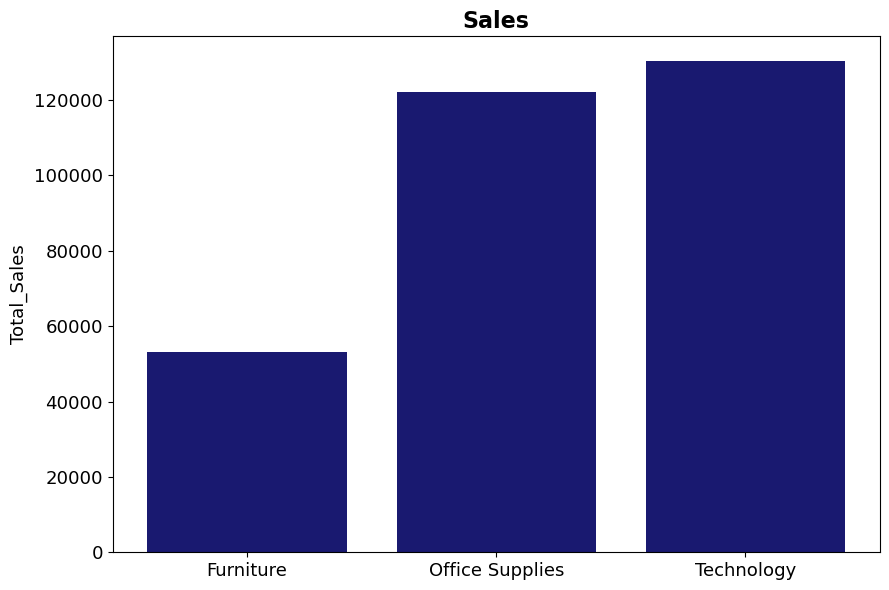

In [186]:
plt.figure(figsize = (9, 6))
plt.bar(x =  df1["Category"] , 
        height =df1["Total_Sale"], 
        color = "midnightblue")
plt.xticks( fontsize = 13)
plt.yticks( fontsize = 13)
plt.title("Sales", fontsize = 16, fontweight = "bold")
plt.ylabel("Total_Sales", fontsize = 13 )
plt.tight_layout()
##plt.savefig("Ice Cream Shop v.png")
plt.show()

## 17. Correlation Analysis: Find the correlation between 'Quantity' and 'Unit_Profit'.

## 17. Correlation Analysis: Find the correlation between 'Quantity' and 'Unit_Profit'.

In [249]:
correlation = df1['Quantity'].corr(df1['Unit_Profit'])
print("Quantity & Unit_Profit correlation between:", correlation)

Quantity & Unit_Profit correlation between: 0.16275520038511085


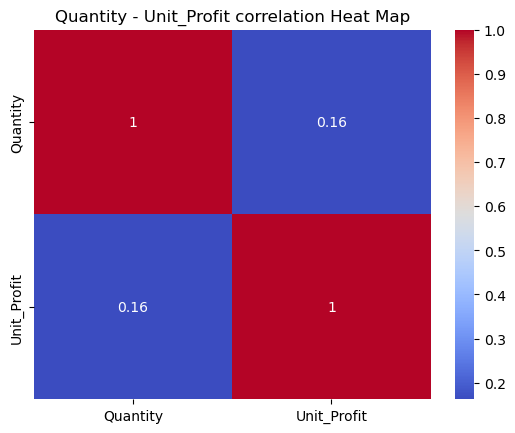

In [251]:
sns.heatmap(df1[['Quantity', 'Unit_Profit']].corr(), annot=True, cmap='coolwarm')
plt.title("Quantity - Unit_Profit correlation Heat Map")
plt.show()

## 18.Handling Duplicates: Identify and remove any duplicate records in the dataset.

In [194]:
duplicates = df1[df1.duplicated()]
print("Duplicate records in the dataset:", len(duplicates))


Duplicate records in the dataset: 0


## 20. Time-Series Analysis: Plot a time-series graph of monthly sales.

## 20. Time-Series Analysis: Plot a time-series graph of monthly sales.

In [196]:
monthly_profit = df1.groupby('Month')['Total_Sale'].sum().reset_index()
monthly_profit

,Month,Total_Sale
0,1,872196.8
1,2,1175649.9
2,3,787157.1
3,4,1019632.4
4,5,824333.4
5,6,794239.3
6,7,797812.1
7,8,999572.7
8,9,854507.5
9,10,1228206.1


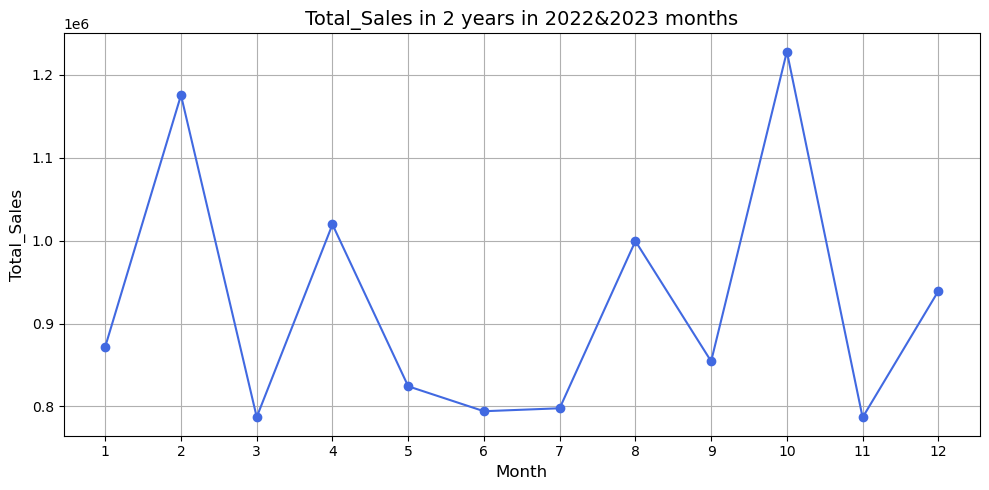

In [253]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_profit['Month'], monthly_profit['Total_Sale'], marker='o', color='royalblue')
plt.title(" Total_Sales in 2 years in 2022&2023 months ", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total_Sales", fontsize=12)
plt.grid(True)
plt.xticks(range(1,13))  # Ayları 1-12 arası göster
plt.tight_layout()
plt.show()

In [200]:
monthly_profit_22 = df1[df1['year'] == 2022].groupby('Month')['Total_Sale'].sum().reset_index()
monthly_profit_22

,Month,Total_Sale
0,1,437431.3
1,2,444011.1
2,3,394105.2
3,4,476400.9
4,5,413625.5
5,6,465300.3
6,7,375278.4
7,8,534562.4
8,9,433887.0
9,10,601707.8


In [202]:
monthly_profit_23 = df1[df1['year'] == 2023].groupby('Month')['Total_Sale'].sum().reset_index()
monthly_profit_23

,Month,Total_Sale
0,1,434765.5
1,2,731638.8
2,3,393051.9
3,4,543231.5
4,5,410707.9
5,6,328939.0
6,7,422533.7
7,8,465010.3
8,9,420620.5
9,10,626498.3


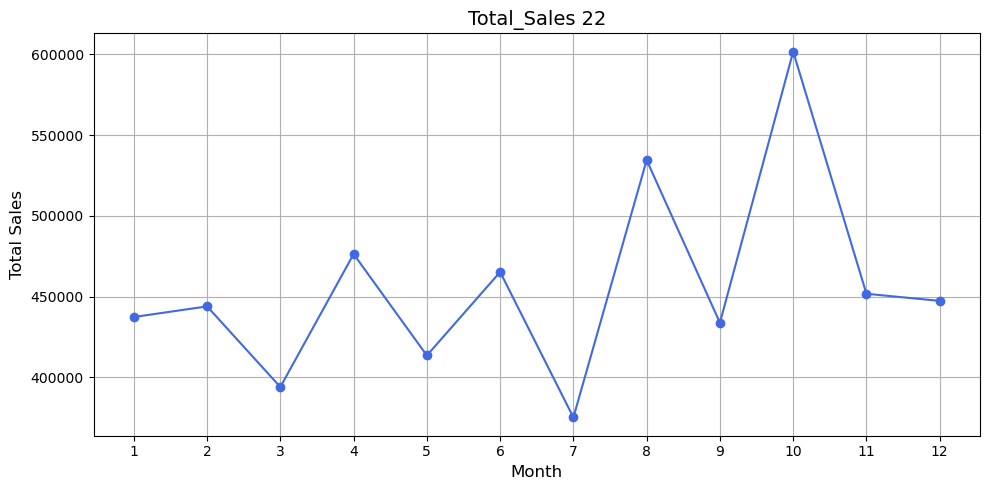

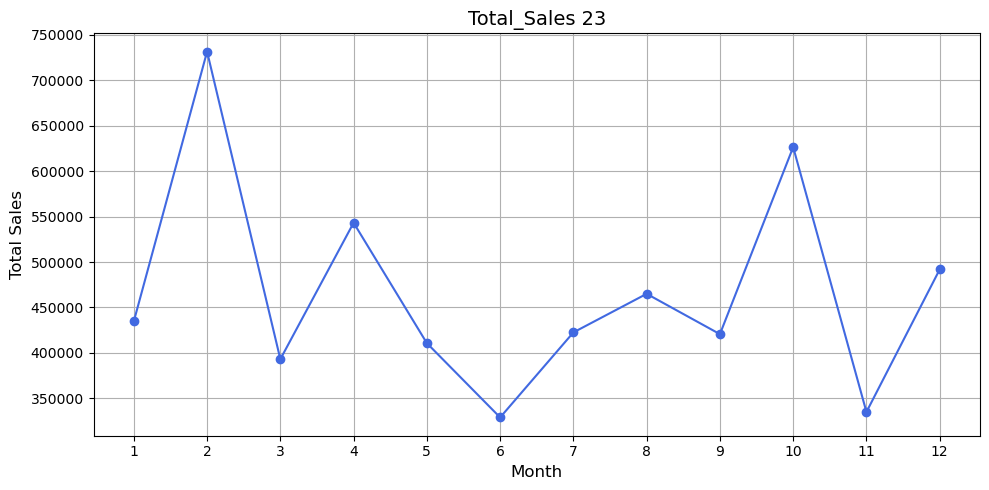

In [255]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_profit_22['Month'], monthly_profit_22['Total_Sale'], marker='o', color='royalblue')
plt.title("Total_Sales 22", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(True)
plt.xticks(range(1,13))  # Ayları 1-12 arası göster
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.plot(monthly_profit_23['Month'], monthly_profit_23['Total_Sale'], marker='o', color='royalblue')
plt.title("Total_Sales 23", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(True)
plt.xticks(range(1,13))  # Ayları 1-12 arası göster
plt.tight_layout()
plt.show()

## 21.Advanced Grouping: What is the monthly growth rate in sales for furniture?

In [206]:
furniture_sales = df1[df1['Category'] == 'Furniture']

In [208]:
monthly_furniture_sales = furniture_sales.groupby('Month')['Total_Sale'].sum().reset_index()

In [210]:
monthly_furniture_sales['Growth_Rate'] = monthly_furniture_sales['Total_Sale'].pct_change() * 100


In [212]:
print(monthly_furniture_sales)

    Month  Total_Sale  Growth_Rate
0       1    296624.3          NaN
1       2    409913.9    38.192960
2       3    278154.5   -32.143189
3       4    301843.0     8.516310
4       5    254858.1   -15.566006
5       6    255627.3     0.301815
6       7    268531.9     5.048209
7       8    392800.3    46.276960
8       9    264174.6   -32.745825
9      10    377455.0    42.880883
10     11    324635.1   -13.993695
11     12    296124.4    -8.782384


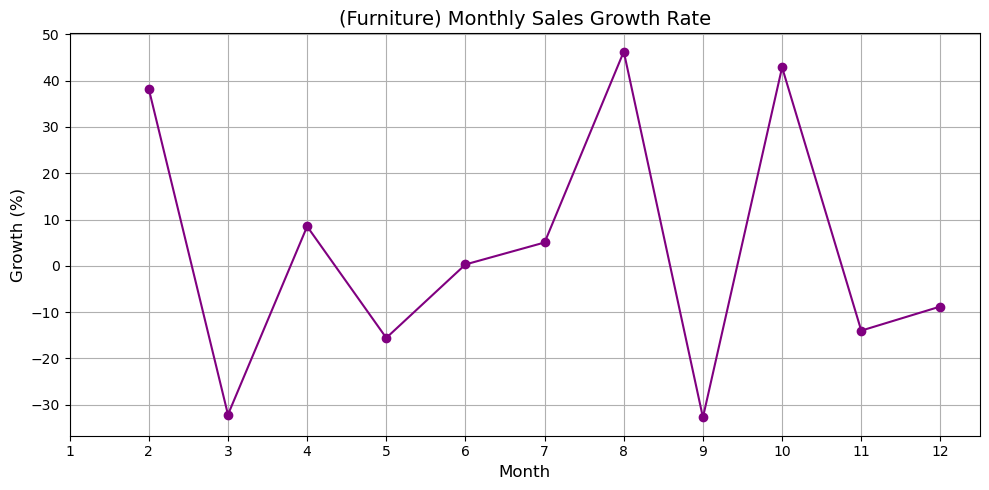

In [257]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_furniture_sales['Month'], monthly_furniture_sales['Growth_Rate'], marker='o', color='purple')
plt.title("(Furniture) Monthly Sales Growth Rate", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Growth (%)", fontsize=12)
plt.grid(True)
plt.xticks(range(1, 13))  # Ayları 1-12 arası göster
plt.tight_layout()
plt.show()

## 22. Multi-Level Sorting: Sort the dataset first by 'Category' and then by 'Unit_Profit' within each category

In [259]:
df1_sorted = df1.sort_values(by=['Category', 'Unit_Profit'], ascending=[True, False])
df1_sorted.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,Quantity,Unit_Selling_Price,Unit_Profit,Total_Profit,Total_Sale,Order_Value,Month,Quarter,year,Month-Year
7243,7244,2022-02-27,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19134,East,Furniture,...,9,4287.4,747.4,6726.6,38586.6,38586.6,2,1,2022,2022-02
9741,9742,2023-08-12,Standard Class,Corporate,United States,Burlington,Vermont,5408,East,Furniture,...,5,4268.0,618.0,3090.0,21340.0,21340.0,8,3,2023,2023-08
9639,9640,2022-11-27,Second Class,Consumer,United States,Concord,North Carolina,28027,South,Furniture,...,13,4085.0,555.0,7215.0,53105.0,53105.0,11,4,2022,2022-11
9056,9057,2022-02-07,First Class,Home Office,United States,New York City,New York,10011,East,Furniture,...,11,2567.6,467.6,5143.6,28243.6,28243.6,2,1,2022,2022-02
9425,9426,2023-09-18,Second Class,Consumer,United States,New York City,New York,10035,East,Furniture,...,6,3600.5,420.5,2523.0,21603.0,21603.0,9,3,2023,2023-09


## 24.Outlier Detection: Identify potential outliers in 'Unit_Selling_Price' within each category.

## 24.Outlier Detection: Identify potential outliers in 'Unit_Selling_Price' within each category.

In [218]:
def find_outliers_iqr(df1, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]


In [220]:
outliers = df1.groupby('Category').apply(lambda x: find_outliers_iqr(x, 'Unit_Selling_Price')).reset_index(drop=True)


C:\Users\Xermespc\AppData\Local\Temp\ipykernel_1444\4058680644.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = df1.groupby('Category').apply(lambda x: find_outliers_iqr(x, 'Unit_Selling_Price')).reset_index(drop=True)


In [222]:
print(outliers[['Category', 'Product Id', 'Unit_Selling_Price']])

        Category       Product Id  Unit_Selling_Price
0      Furniture  FUR-TA-10001539              1658.7
1      Furniture  FUR-TA-10000577               988.0
2      Furniture  FUR-BO-10004834              2987.6
3      Furniture  FUR-CH-10000454              1891.5
4      Furniture  FUR-CH-10004287              1670.4
...          ...              ...                 ...
1131  Technology  TEC-AC-10003033              1600.5
1132  Technology  TEC-PH-10004586              1036.8
1133  Technology  TEC-PH-10001459              2899.2
1134  Technology  TEC-PH-10002645              1440.0
1135  Technology  TEC-CO-10003763              2688.0

[1136 rows x 3 columns]


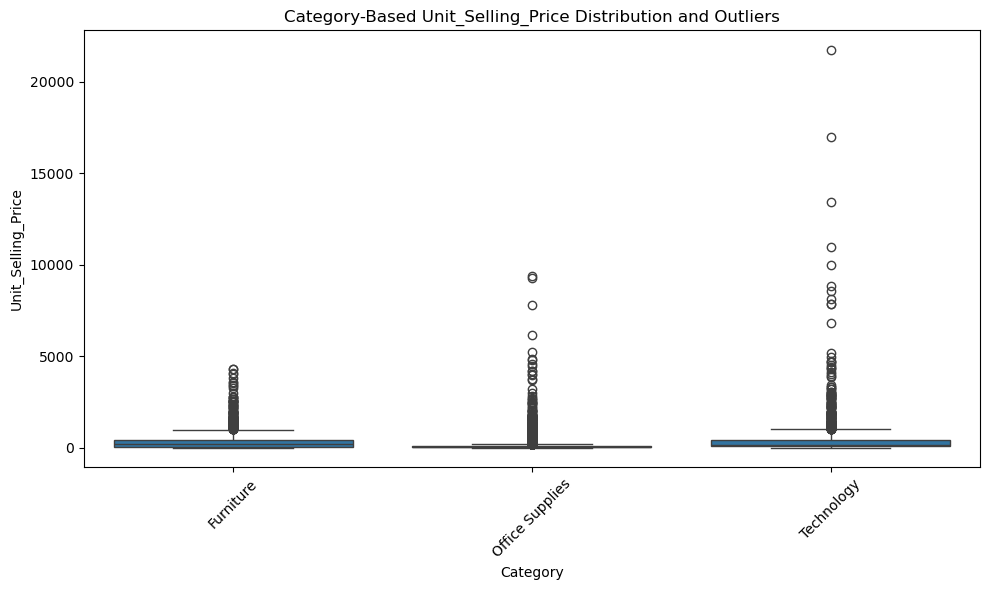

In [261]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Unit_Selling_Price', data=df1)
plt.title('Category-Based Unit_Selling_Price Distribution and Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 25. Predictive Modeling: 
Build a simple linear regression model to predict 'Unit_Profit' based on 'Unit_Selling_Price' and 'Quantity'.

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [228]:
X = df1[['Unit_Selling_Price', 'Quantity']]  # Bağımsız değişkenler
y = df1['Unit_Profit']                       # Bağımlı değişken


In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [232]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [234]:
y_pred = model.predict(X_test)

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 1950.070212627468
R-squared (R²): 0.8149365643358186


In [236]:
print("Intercept (β₀):", model.intercept_)
print("Coefficients (β₁, β₂):", model.coef_)


Intercept (β₀): -1.0067431337981745
Coefficients (β₁, β₂): [ 0.09836985 -0.11098271]


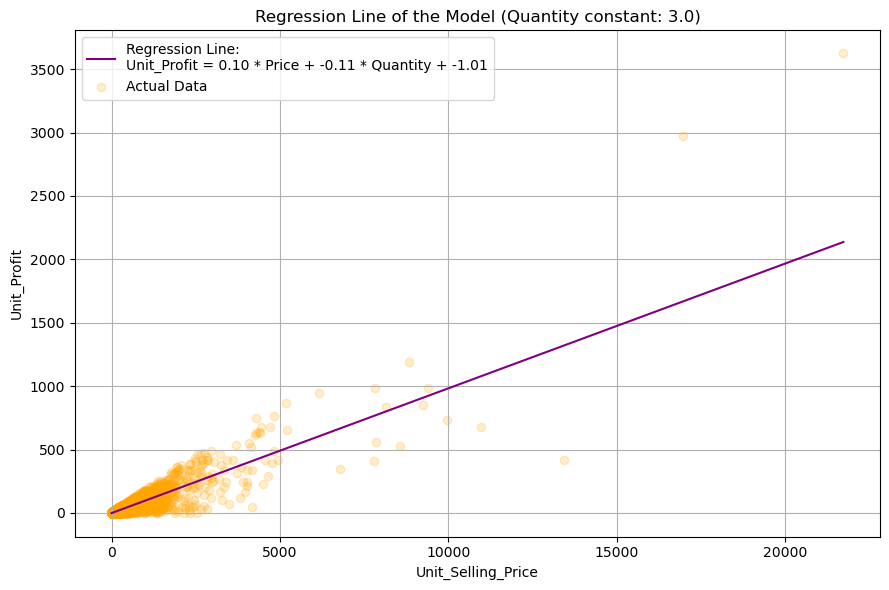

In [265]:


# Modelin katsayıları
intercept = model.intercept_
coef_price = model.coef_[0]
coef_quantity = model.coef_[1]

# Quantity sabit: ortanca değer
quantity_fixed = df1['Quantity'].median()

# X ekseni: Unit_Selling_Price aralığı
price_range = np.linspace(df1['Unit_Selling_Price'].min(), df1['Unit_Selling_Price'].max(), 100)

# Gerçek model tahmini
model_line = coef_price * price_range + coef_quantity * quantity_fixed + intercept

# Grafik çizimi
plt.figure(figsize=(9, 6))
plt.plot(price_range, model_line, color='purple', label=f"Regression Line:\nUnit_Profit = {coef_price:.2f} * Price + {coef_quantity:.2f} * Quantity + {intercept:.2f}")
plt.scatter(df1['Unit_Selling_Price'], df1['Unit_Profit'], alpha=0.2, color='orange', label='Actual Data')

plt.xlabel('Unit_Selling_Price')
plt.ylabel('Unit_Profit')
plt.title(f'Regression Line of the Model (Quantity constant: {quantity_fixed})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 1. Intercept (β₀) = -1.0067
## This means that when Unit_Selling_Price and Quantity are both zero, the predicted Unit_Profit is approximately -1.01. This suggests that, in theory, ## if no sales are made (i.e., zero price and quantity), the model predicts a negative profit.

## 2. Coefficient for Unit_Selling_Price (β₁) = 0.0984
## This means that for each 1 unit increase in Unit_Selling_Price, the Unit_Profit is expected to increase by 0.0984 units. Since this coefficient is ## positive, it shows that as the price increases, the profit increases, although the increase is modest.

## 3. Coefficient for Quantity (β₂) = -0.1110
## This means that for each 1 unit increase in Quantity, the Unit_Profit is expected to decrease by 0.1110 units. Since this coefficient is negative, ## it shows that as the quantity of items sold increases, the profit decreases. This could be due to factors like lower pricing or reduced margins when ## larger quantities are sold.

